In [39]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
drop_cols = ["time_stamp",
             "Machine1.Zone1Temperature.C.Actual", "Machine2.Zone1Temperature.C.Actual", "Machine3.Zone1Temperature.C.Actual",
             "Machine1.Zone2Temperature.C.Actual", "Machine2.Zone2Temperature.C.Actual", "Machine3.Zone2Temperature.C.Actual",
             "Machine2.ExitZoneTemperature.C.Actual", "Machine3.ExitZoneTemperature.C.Actual",
             "Machine2.MotorAmperage.U.Actual", "Machine2.MotorRPM.C.Actual",
             "FirstStage.CombinerOperation.Temperature3.C.Actual"]

df0_indexed = pd.read_csv("../Data/df0_indexed.csv")

X0, y0 = df0_indexed.iloc[:, :42], df0_indexed.iloc[:, 42:44]

X0_reduced = X0.copy()
X0_reduced.drop(drop_cols, axis=1, inplace=True)

y0_Actual = y0.iloc[:, 0]

In [3]:
print(X0_reduced.shape)
print(y0_Actual.shape)

(13927, 30)
(13927,)


In [4]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0_reduced, y0_Actual, test_size=0.3, random_state=42)

In [6]:
DecisionTreeRegModel = DecisionTreeRegressor()
DecisionTreeRegModel.fit(X0_train,y0_train)

DecisionTreeRegressor()

In [9]:
y0_pred = DecisionTreeRegModel.predict(X0_test)

In [11]:
r2_score(y0_test, y0_pred)

0.7832834167293528

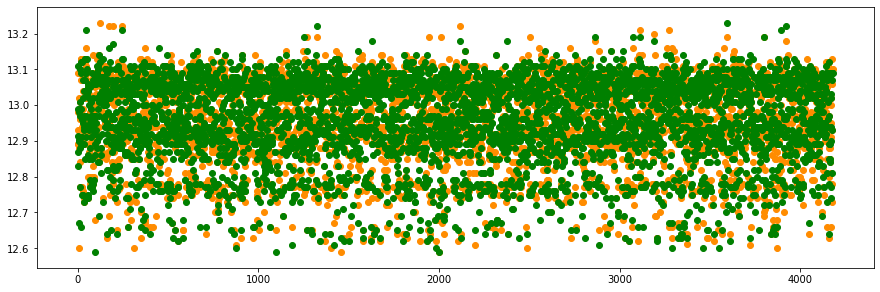

In [27]:
# test 데이터
plt.figure(figsize=(15, 4.8))
plt.scatter(np.arange(len(X0_test)), y0_pred, c="darkorange")
plt.scatter(np.arange(len(X0_test)), y0_test, c="green")

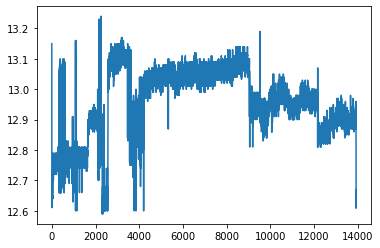

In [34]:
plt.plot(DecisionTreeRegModel.predict(X0_reduced))

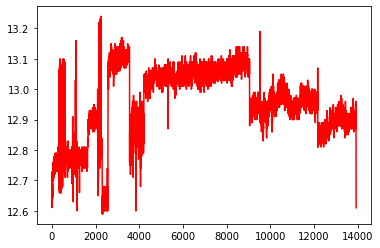

In [35]:
plt.plot(y0_Actual, "r")

In [40]:
mse = mean_squared_error(y0_test, y0_pred)
rmse = np.sqrt(mse)

mse
rmse

0.0030279676213319927

0.05502697176232754